# Plot scan

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from auxPlots import interpolateData,getContours,saveContours
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [2]:
#Load scan data
# dataDF = pd.read_pickle('./strong_Fig13b.pcl')
dataDF = pd.read_pickle('../test.pcl')

In [3]:
with open('../ATLAS_data/HEPData-ins2628398-v1-csv/excl_xsec_strong_mgluino_2400.csv','r') as f:
    blocks = f.read().split('#: Lifetime,')[2:]
atlasCurves = {}
for b in blocks:
    tau_ns = eval(b.split('\n')[0].replace('ns',''))
    if 'Limit,Expected' in b:
        continue
    lines = b.split('\n')[5:]
    atlasCurve = np.genfromtxt(lines,delimiter=',',comments='#')
    atlasCurves[tau_ns] = atlasCurve


In [4]:
# Add sigma_UL
dataDF['sigma_UL_fb'] = 0.027/dataDF['AccEff']
dataDF['sigma_UL_fb_comb'] = dataDF['Total xsec (pb)']*dataDF['kfactor']*1e3/dataDF['robs_comb']

### Define colors and plotting order

In [5]:
srs = {'HighPT' : dataDF[(dataDF['SR'] == 'HighPT')], 'Trackless' : dataDF[(dataDF['SR'] == 'Trackless')]}

### Plot excluded points grouped by most excluding analysis

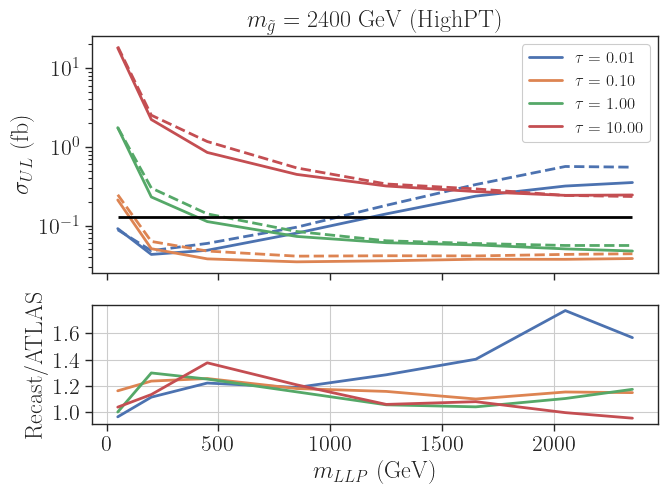

In [6]:
data = srs['HighPT']
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(7,5))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

for tau_ns,atlasCurve in atlasCurves.items():
    data_tau = data[abs(data['tau_ns'] - tau_ns)/tau_ns < 0.01]
    # label = r'$\tau = %1.2f$ (Recast)' %tau_ns
    label = None
    p = axarr[0].plot(data_tau['mLLP'],data_tau['sigma_UL_fb'],label=label,linewidth=2,linestyle='dashed')
    color = p[0].get_color()
    # label = r'$\tau = %1.2f$ (ATLAS)' %tau_ns
    label = r'$\tau = %1.2f$' %tau_ns
    axarr[0].plot(atlasCurve[:,0],atlasCurve[:,1],label=label,c=color,linewidth=2,linestyle='solid')

    ratio = data_tau['sigma_UL_fb']/atlasCurve[:,1]
    axarr[1].plot(atlasCurve[:,0],ratio,c=color,linewidth=2)

axarr[0].hlines(y=0.128,xmin=min(atlasCurve[:,0]),xmax=max(atlasCurve[:,0]),linewidth=2,colors='black')
axarr[0].legend(loc='upper right',framealpha=1.,fontsize=12)
axarr[0].set_yscale('log')
axarr[1].set_yticks(np.arange(1.0,1.6,0.2))
axarr[1].set_xlabel(r'$m_{LLP}$ (GeV)')
axarr[0].set_ylabel(r'$\sigma_{UL}$ (fb)')
axarr[1].set_ylabel(r'Recast/ATLAS')
# # plt.xlim(1e-3,30)
# plt.ylim(0,500)
plt.grid()
plt.tight_layout()
axarr[0].set_title(r'$m_{\tilde g} = 2400$ GeV (HighPT)')
plt.savefig('recast_Fig13b.png')
plt.show()

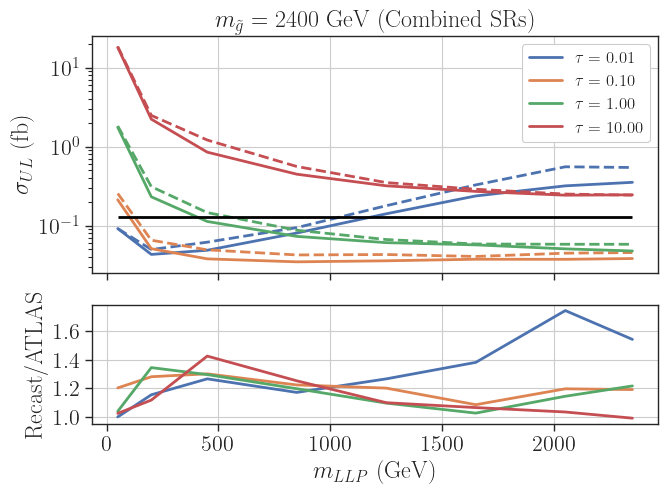

In [8]:
data = srs['HighPT']
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(7,5))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

for tau_ns,atlasCurve in atlasCurves.items():
    data_tau = data[abs(data['tau_ns'] - tau_ns)/tau_ns < 0.01]
    # label = r'$\tau = %1.2f$ (Recast)' %tau_ns
    label = None
    p = axarr[0].plot(data_tau['mLLP'],data_tau['sigma_UL_fb_comb'],label=label,linewidth=2,linestyle='dashed')
    color = p[0].get_color()
    # label = r'$\tau = %1.2f$ (ATLAS)' %tau_ns
    label = r'$\tau = %1.2f$' %tau_ns
    axarr[0].plot(atlasCurve[:,0],atlasCurve[:,1],label=label,c=color,linewidth=2,linestyle='solid')

    ratio = data_tau['sigma_UL_fb_comb']/atlasCurve[:,1]
    axarr[1].plot(atlasCurve[:,0],ratio,c=color,linewidth=2)

axarr[0].hlines(y=0.128,xmin=min(atlasCurve[:,0]),xmax=max(atlasCurve[:,0]),linewidth=2,colors='black')
axarr[0].legend(loc='upper right',framealpha=1.,fontsize=12)
axarr[0].set_yscale('log')
axarr[1].set_yticks(np.arange(1.0,1.6,0.2))
axarr[1].set_xlabel(r'$m_{LLP}$ (GeV)')
axarr[0].set_ylabel(r'$\sigma_{UL}$ (fb)')
axarr[1].set_ylabel(r'Recast/ATLAS')
# # plt.xlim(1e-3,30)
# plt.ylim(0,500)
axarr[0].grid()
plt.grid()
plt.tight_layout()
axarr[0].set_title(r'$m_{\tilde g} = 2400$ GeV (Combined SRs)')
plt.savefig('recast_Fig13b.png')
plt.show()